# Bear Market Builders

###  RPGF3 List ✨

In [1]:
from collections import defaultdict
from datetime import datetime, timedelta, timezone
import json
import numpy as np
import pandas as pd

from scripts.eas_lists import listify, create_eas_json

# Prep

In [2]:
# settings

DATA_DIR  = "data/RPGF3/"
DATA_PATH = DATA_DIR + "2023-11-13_RPGF3_snapshot.csv"

LIST_NAME = "Bear Market Builders on Open Source Observer"
LINK_BASE = "https://github.com/opensource-observer/insights/blob/main/notebooks/"
FILENAME  = "2023-11-13_RPGF3_BearMarketBuilders.ipynb"
LIST_LINK = LINK_BASE + FILENAME

LIST_DESC = " ".join([
                "This list awards 50K OP tokens to any *active* RPGF3 project in any impact category",
                "that is represented on https://opensource.observer that started before Nov 2021.",
                "Only projects with unique, public GitHub repos included in their application have been indexed by OSO.",
                "It also awards a token bonus to projects based on the number of full-time active developers they have",
                "on GitHub in the last 6 months: 20K tokens for 1-2 MACs, 30K for 3-5, 40K for 6-9, 50K for 10+.", 
                "Note: lists generated by the OSO team do not include OSO in them in order to comply",
                "with voting rules, so please consider adding our project to your ballot separately. Always DYOR!"
                ]) 

LIST_CATS = [
            #'COLLECTIVE_GOVERNANCE',
            #'DEVELOPER_ECOSYSTEM', 
            #'END_USER_EXPERIENCE_AND_ADOPTION', 
            'OP_STACK'
            ]

JSON_PATH = DATA_DIR + "lists/OSO_BearMarketBuilders.json"

In [3]:
# ingest data

df = pd.read_csv(DATA_PATH)
cols = ['Project ID', 'Project Name', 'OSO Slug', 'Applicant Type',
        'Date First Commit', 'Avg Monthly Active Devs Last 6 Months']

df = df[df['Applicant Type'] == 'PROJECT']
df = df[cols].dropna()

len(df)

286

# Get the data to power the list

In [4]:
# run analysis

def scorer(row):
    
    if not isinstance(row['OSO Slug'], str):
        return 0
    
    if row['Date First Commit'] >= '2021-11-01':
        return 0
    
    score = 50000
    mads = row['Avg Monthly Active Devs Last 6 Months']
    if not np.isnan(mads):
        if mads >= 10:
            score += 50000
        elif mads >= 6:
            score += 40000
        elif mads >=3:
            score += 30000
        elif mads >= 1:
            score += 20000
    
    return score
        
scores = []
for _,row in df.iterrows():
    scores.append(scorer(row))

In [5]:
# transform the results

scores_to_projects = dict(zip(df['OSO Slug'], scores))
slugs_to_ids = dict(zip(df['OSO Slug'], df['Project ID']))

# Generate the list data

In [6]:
award_amt = sum(scores_to_projects.values())
award_amt

10290000

In [7]:
named_list = listify(scores_to_projects, award_amt)
rpgf_list = {slugs_to_ids[k]:v for k,v in named_list.items()}

156


<AxesSubplot:>

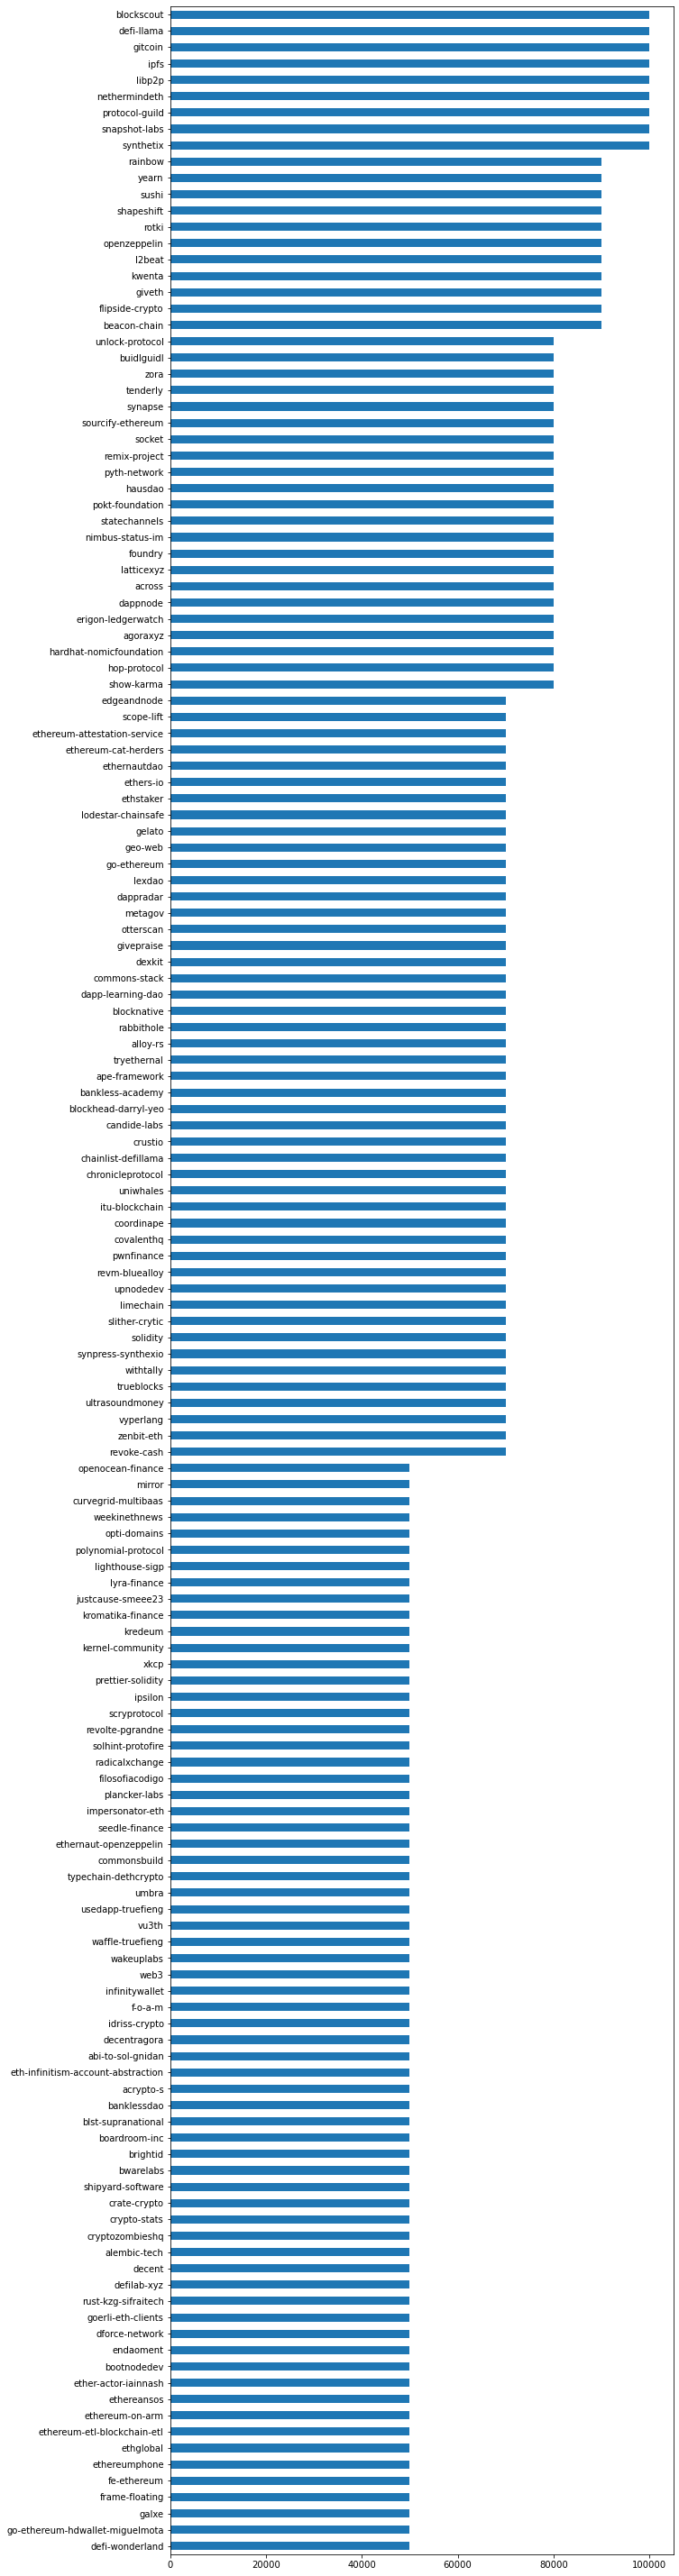

In [8]:
series = pd.Series(named_list).sort_values()
series = series[series>0]
print(len(series))
series.plot(kind='barh', figsize=(10,len(rpgf_list)/3))

In [9]:
eas_metadata = create_eas_json(rpgf_list, LIST_NAME, LIST_LINK, LIST_DESC, LIST_CATS)

In [10]:
with open(JSON_PATH, "w") as f:
    json.dump(eas_metadata, f, indent=4)